## kaggle titanic 필사 입니다.

* https://kaggle-kr.tistory.com/17?category=868316#2.2-Sex

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno


import warnings
warnings.filterwarnings('ignore')

## 1. Dataset 확인

In [3]:
df_train = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 Null data check

In [7]:
for col in df_train.columns:
    msg = f'column :{col:>10}\t Percent of Nan value:{100*df_train[col].isnull().sum()/df_train[col].shape[0]:.2f}%'
    print(msg)

column :PassengerId	 Percent of Nan value:0.00%
column :  Survived	 Percent of Nan value:0.00%
column :    Pclass	 Percent of Nan value:0.00%
column :      Name	 Percent of Nan value:0.00%
column :       Sex	 Percent of Nan value:0.00%
column :       Age	 Percent of Nan value:19.87%
column :     SibSp	 Percent of Nan value:0.00%
column :     Parch	 Percent of Nan value:0.00%
column :    Ticket	 Percent of Nan value:0.00%
column :      Fare	 Percent of Nan value:0.00%
column :     Cabin	 Percent of Nan value:77.10%
column :  Embarked	 Percent of Nan value:0.22%


In [8]:
for col in df_test.columns:
    msg = f'column :{col:>10}\t Percent of Nan value:{100*df_test[col].isnull().sum()/df_test[col].shape[0]:.2f}%'
    print(msg)

column :PassengerId	 Percent of Nan value:0.00%
column :    Pclass	 Percent of Nan value:0.00%
column :      Name	 Percent of Nan value:0.00%
column :       Sex	 Percent of Nan value:0.00%
column :       Age	 Percent of Nan value:20.57%
column :     SibSp	 Percent of Nan value:0.00%
column :     Parch	 Percent of Nan value:0.00%
column :    Ticket	 Percent of Nan value:0.00%
column :      Fare	 Percent of Nan value:0.24%
column :     Cabin	 Percent of Nan value:78.23%
column :  Embarked	 Percent of Nan value:0.00%


<AxesSubplot:>

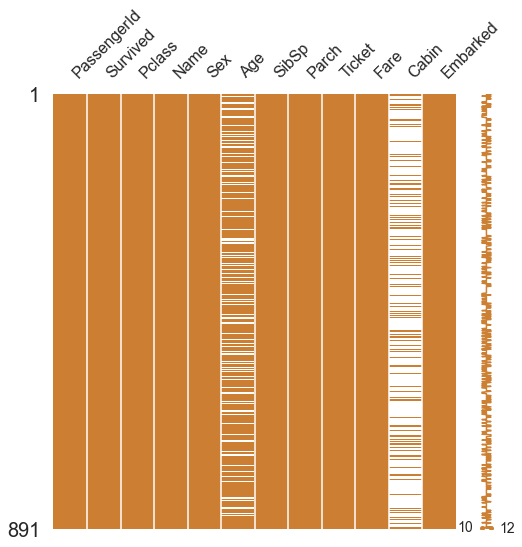

In [9]:
# MANO 라는 라이브러리를 이용해 null값 확인
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

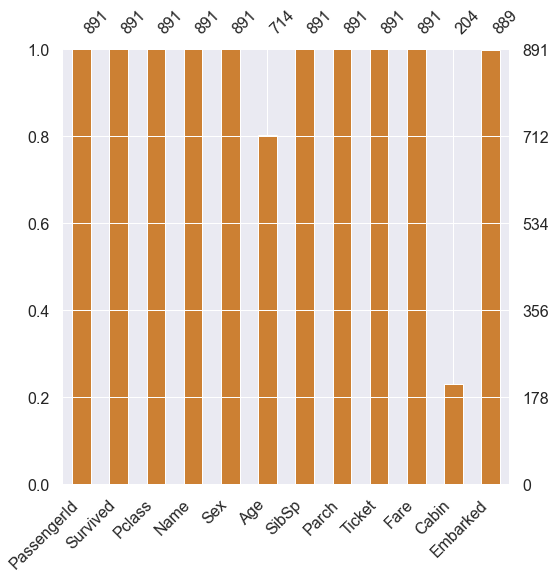

In [10]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

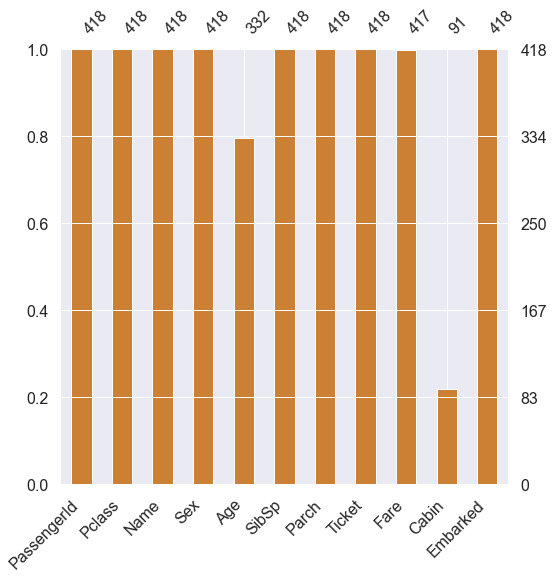

In [11]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### 1.2 Target label 확인
- binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있음

- 살아남은 사람 38.4%

Text(0.5, 1.0, 'Count plot - Survived')

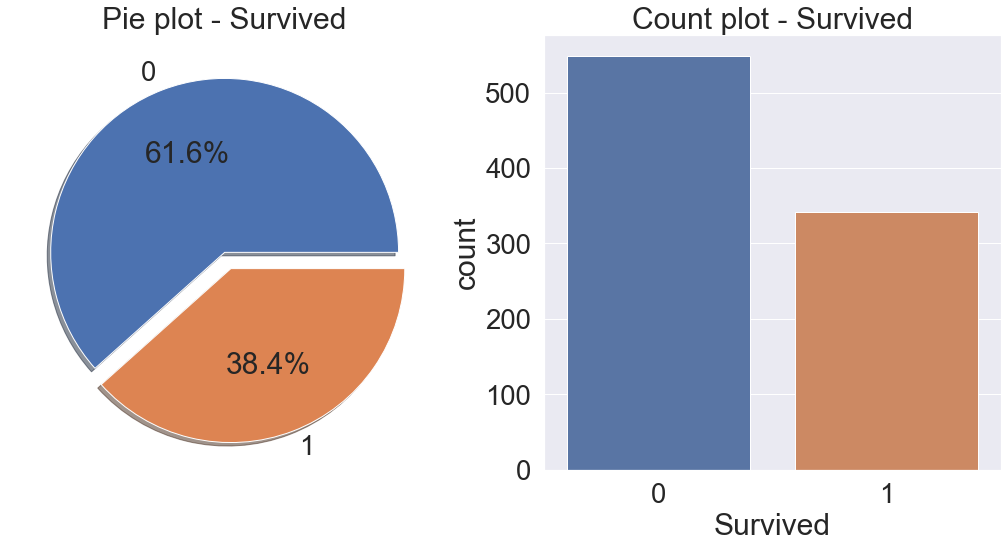

In [12]:
fig, ax = plt.subplots(1,2, figsize=(18,8))

# explode는 부채꼴이 파이 차트의 중심에서 벗어나는 정도를 설정
# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정
explode = [0, 0.1]
df_train['Survived'].value_counts().plot.pie(explode=explode, autopct='%.1f%%', ax=ax[0], shadow=True )
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

## EDA

### 2.1 Pclass

- Pclass 는 ordinal, 서수형 데이터. 카테고리이면서, 순서가 있는 데이터 타입

In [13]:
# Pclass 에 따른 생존률의 차이

# count를 하면 각 class에 몇명이 있었는지 보여줌
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
# sum을 하면 각 class에 suvived가 1인(살아남은 사람)이 몇명 인지있었는지 보여줌
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

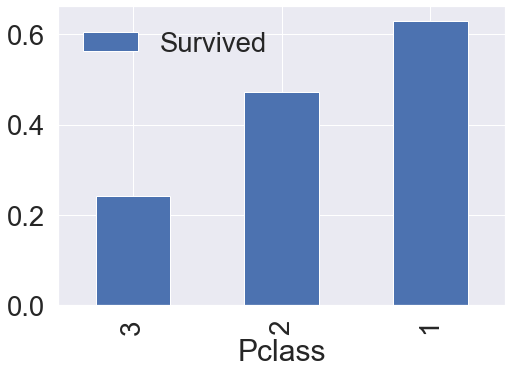

In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=True).plot.bar()

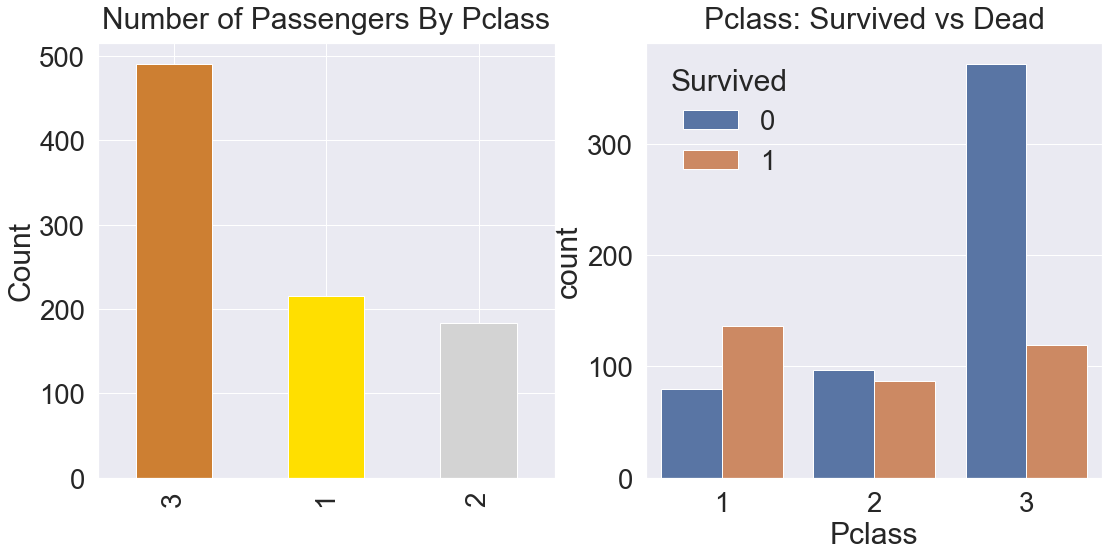

In [17]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

### 2.2 Sex

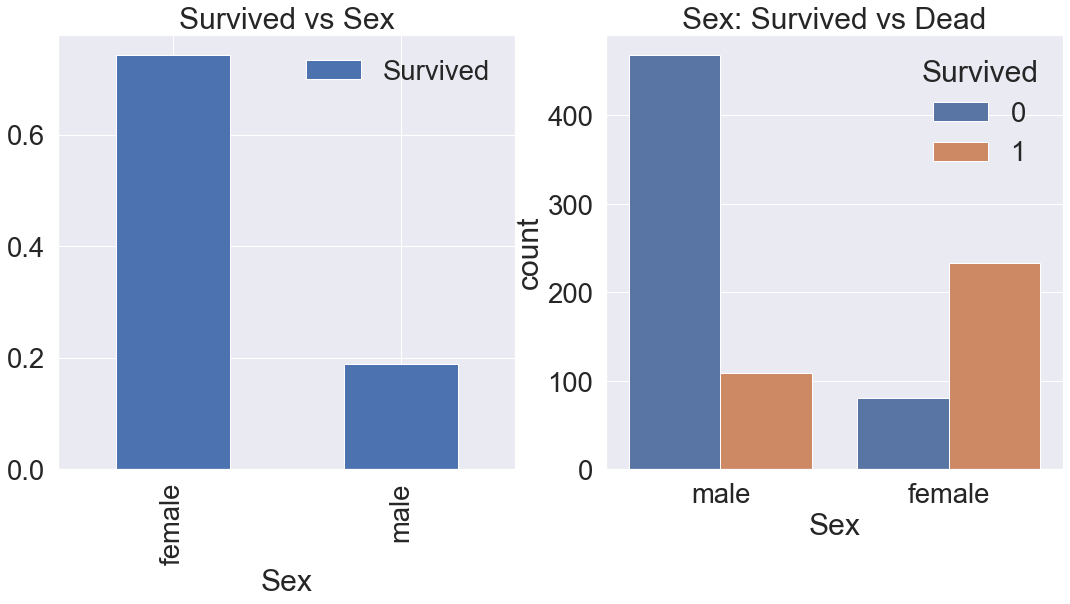

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [23]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [24]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 2.3 Both Sex and Pclass

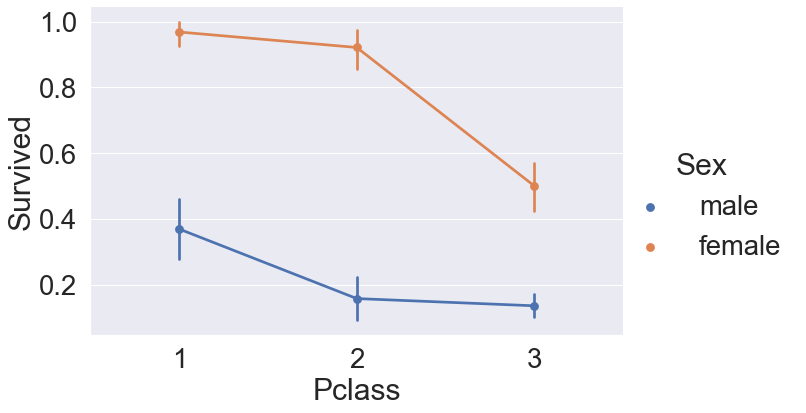

In [25]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)

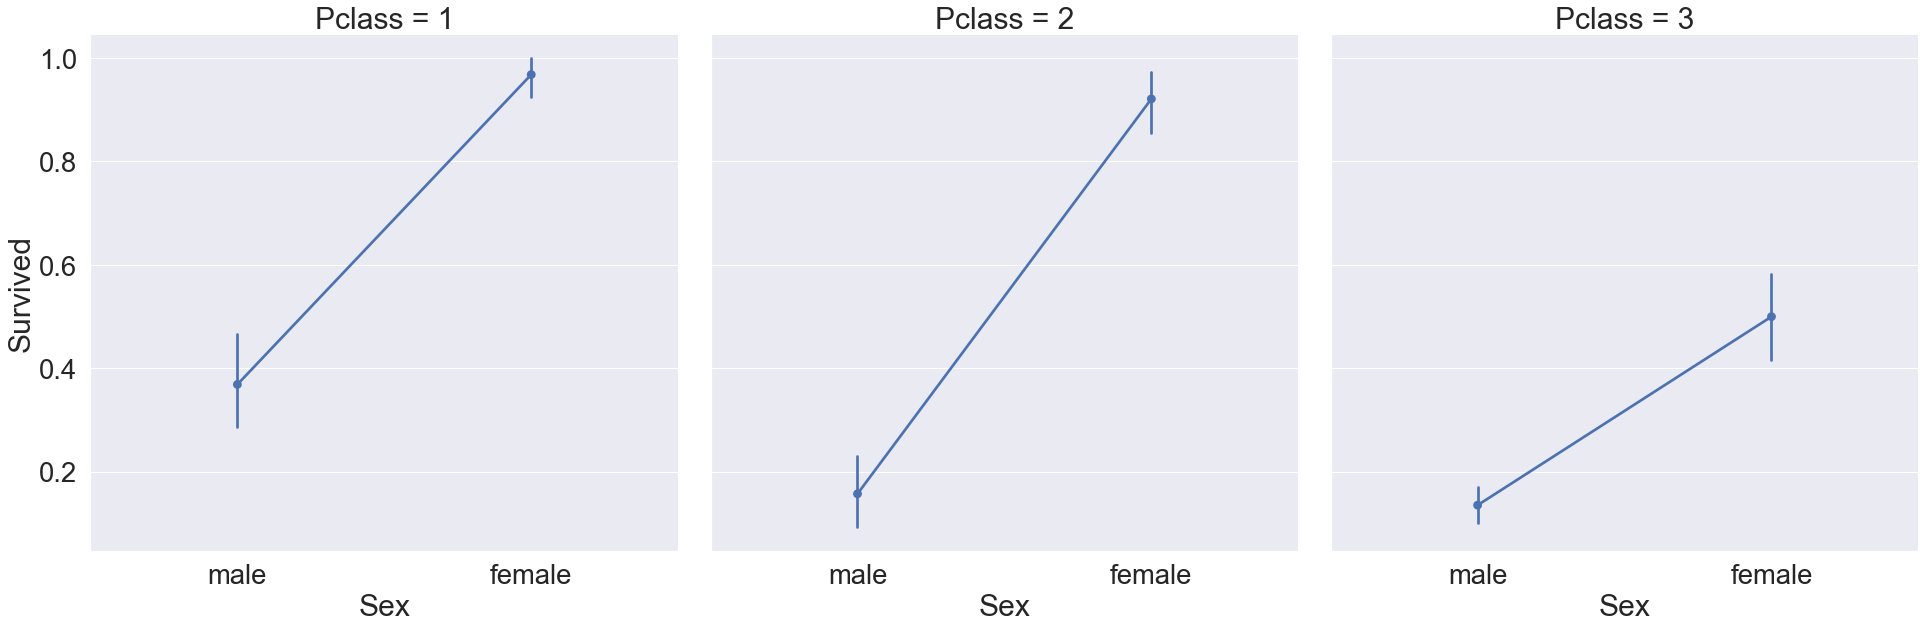

In [26]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5,
               size=9, aspect=1
              )

### 2.4 Age

In [27]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


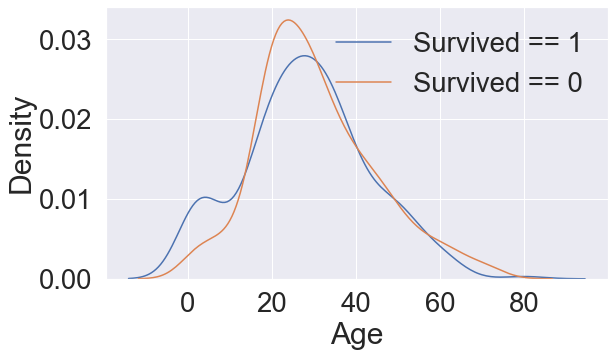

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

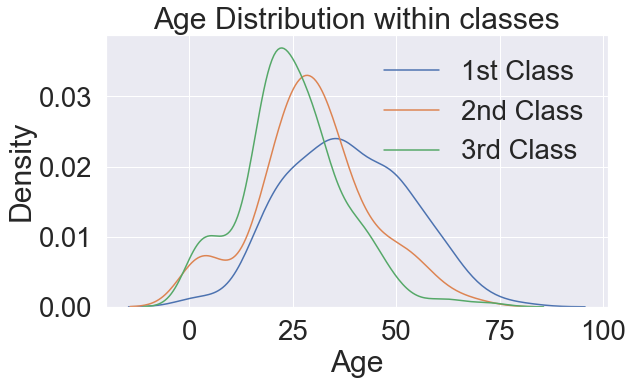

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(df_train['Age'][df_train['Pclass'] == 1], ax=ax)
sns.kdeplot(df_train['Age'][df_train['Pclass'] == 2], ax=ax)
sns.kdeplot(df_train['Age'][df_train['Pclass'] == 3], ax=ax)

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

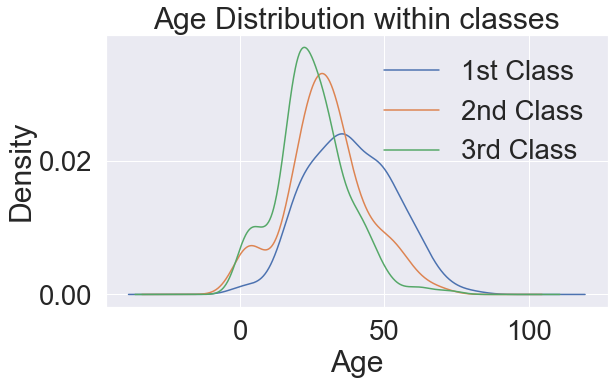

In [32]:
plt.figure(figsize=(9, 5))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

38

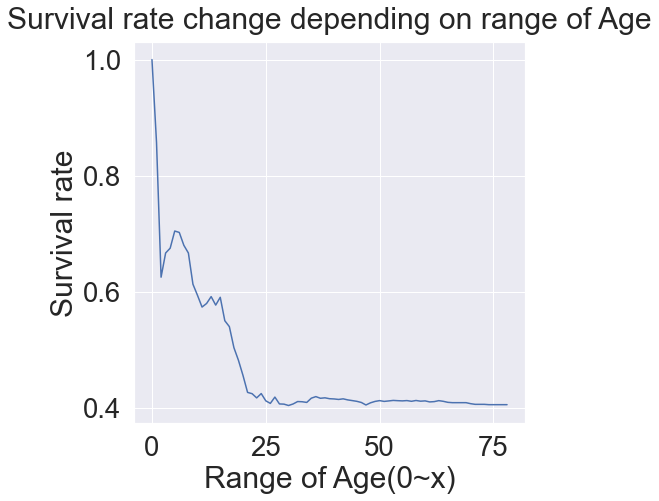

In [45]:
#나이대가 변하면서 생존률이 어떻게 되는 지 보려고 합니다.
#나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.

cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train['Survived'][df_train['Age']<i].sum()/
                                   len(df_train['Survived'][df_train['Age']<i]))


plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

# 나이가 중요한 feature 로 쓰일 수 있음을 확인

### 2.5 Pclass, Sex, Age

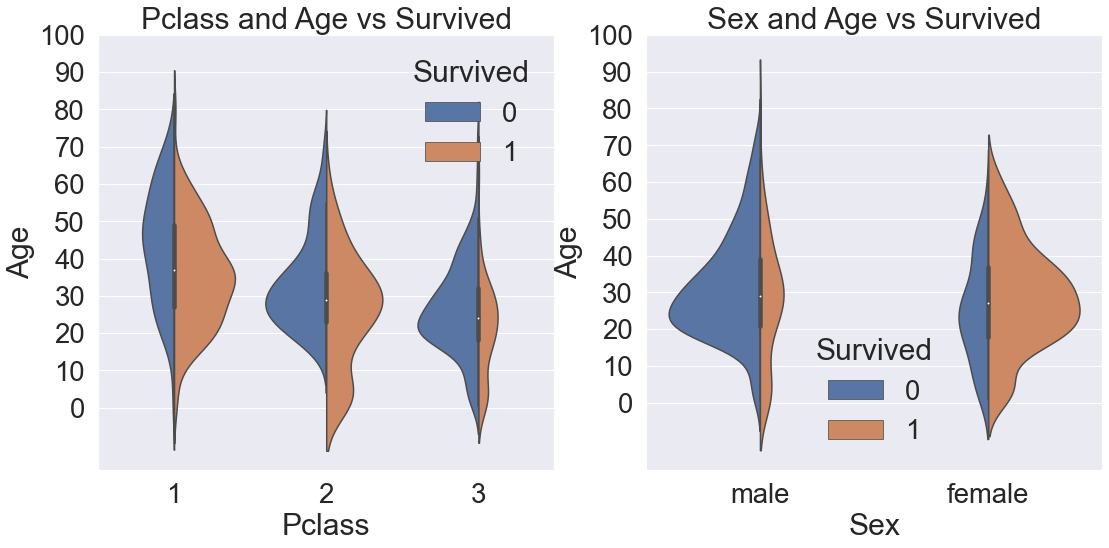

In [56]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### 2.6 Embarked

* 탑승한 항구를 나타냄

<AxesSubplot:xlabel='Embarked'>

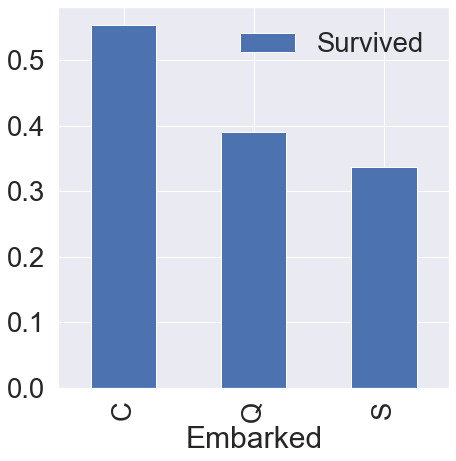

In [67]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

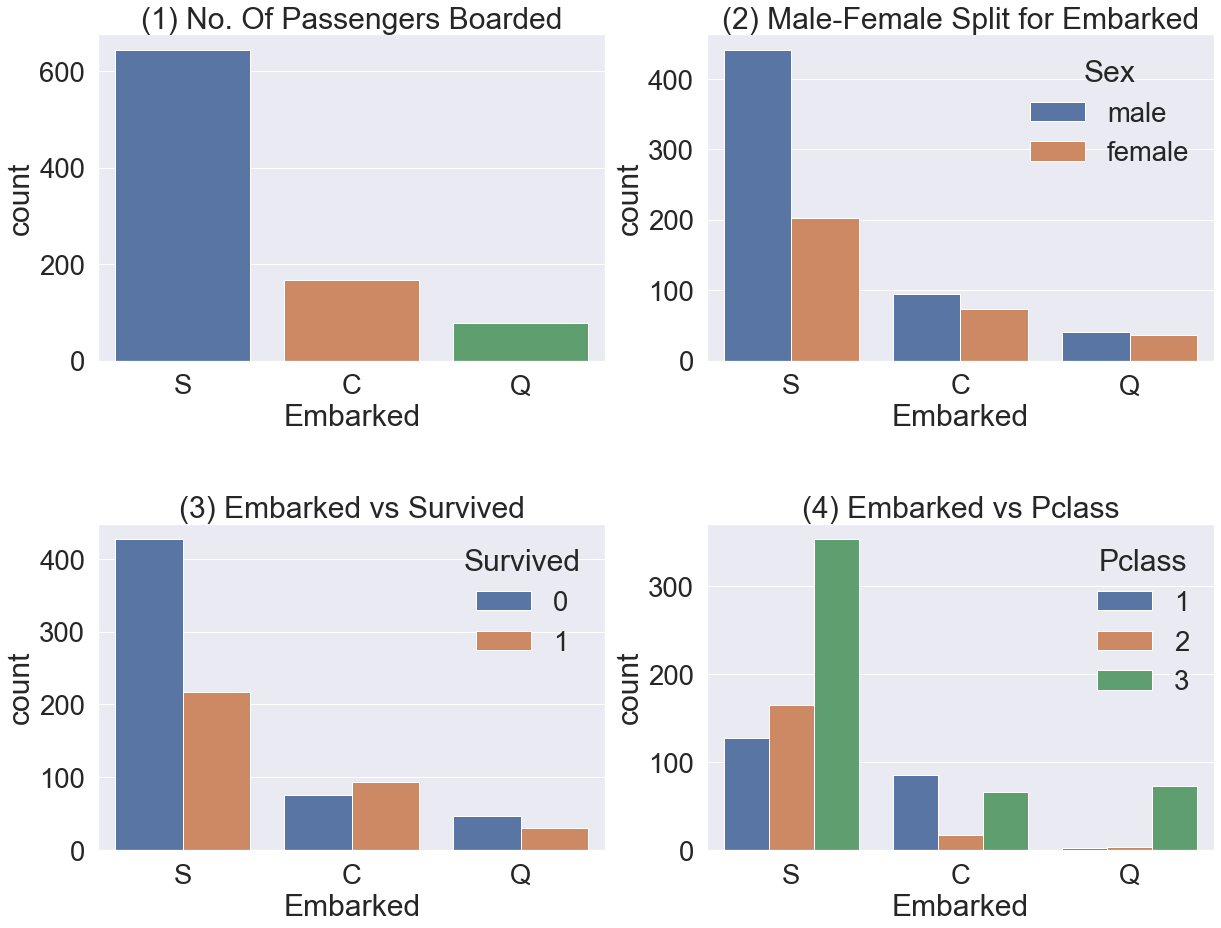

In [73]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [74]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [75]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


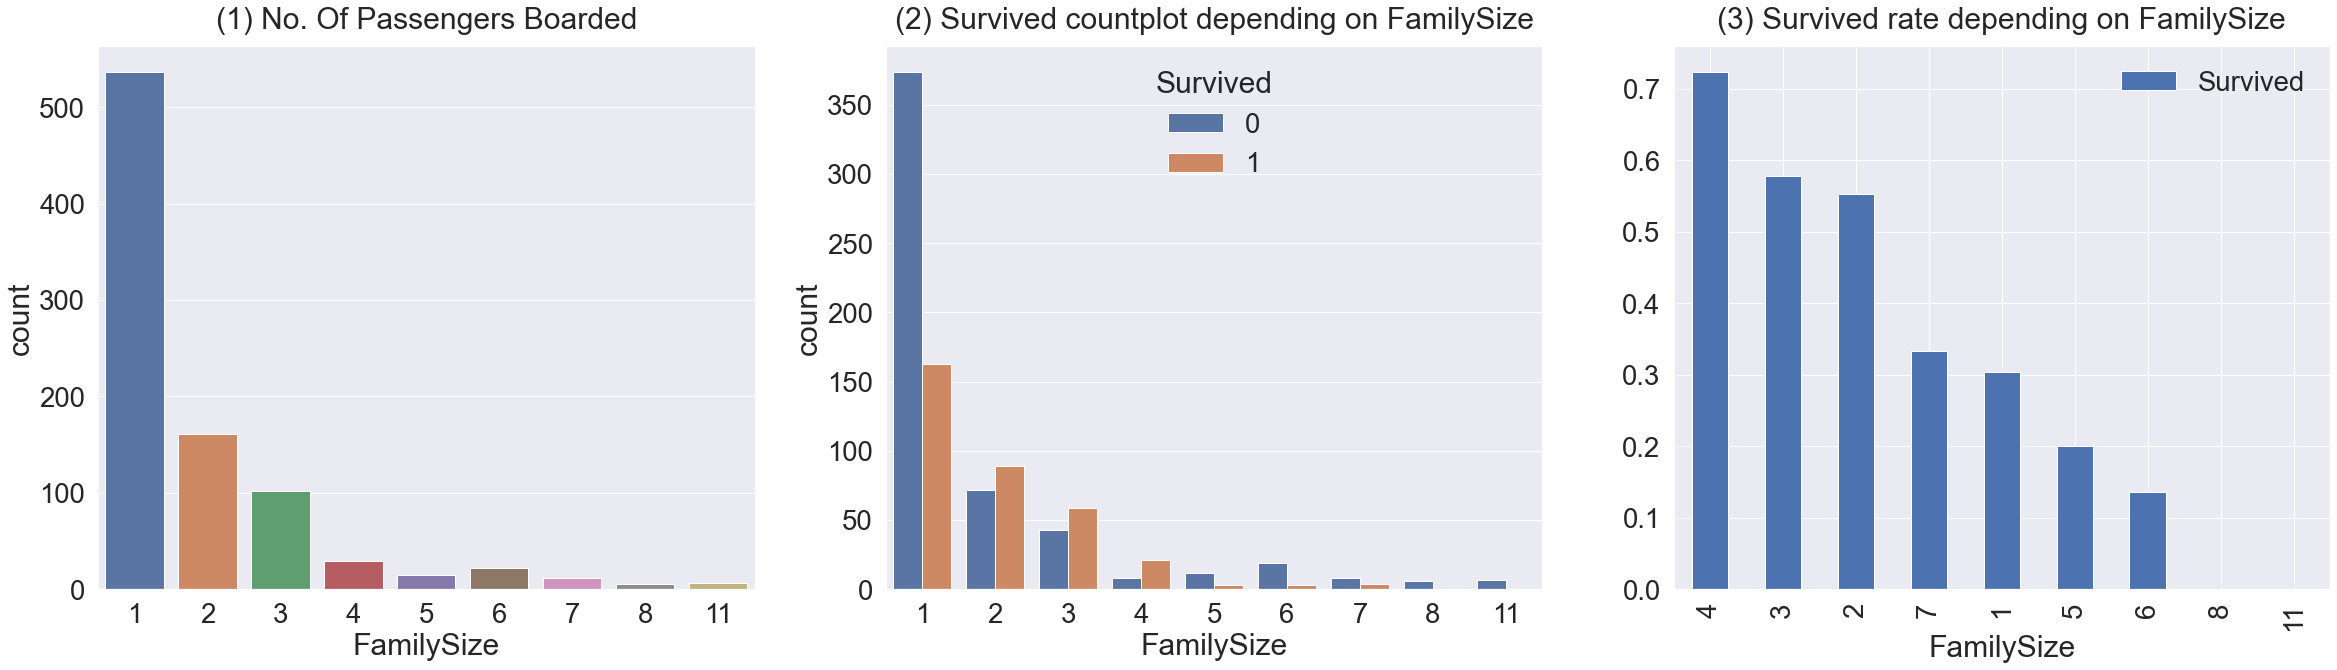

In [76]:
# FamilySize 와 생존의 관계를 한번 살펴봅시다
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.8 Fare

* Fare 는 탑승요금이며, contious feature 입니다. 한번 histogram 을 그려보겠습니다.


* 보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.


* outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.

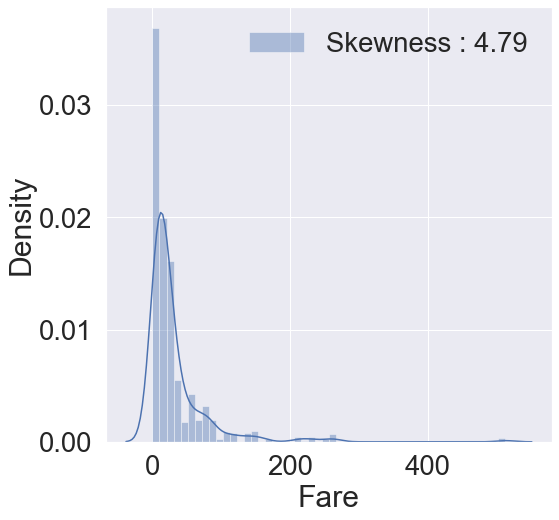

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [78]:
# null값 채워주기
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

In [79]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

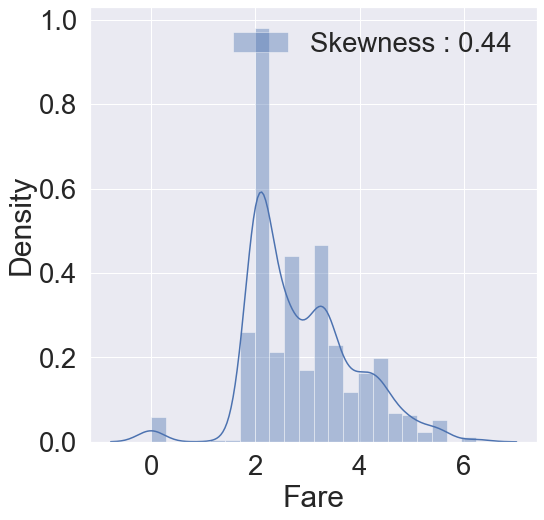

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.

### 2.9 Cabin

* 이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.
* 그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.

### 2.10 Ticket
* 이 feature 는 NaN 은 없습니다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.

In [82]:
df_train['Ticket'].value_counts()

347082               7
CA. 2343             7
1601                 7
3101295              6
347088               6
                    ..
347064               1
4134                 1
349215               1
228414               1
STON/O 2. 3101274    1
Name: Ticket, Length: 681, dtype: int64

* 보시다시피, ticket number 는 매우 다양합니다. 우리는 여기서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까요?